<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/PV_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
df=pd.read_excel("/content/pv_04.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [79]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	15
R

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=141,
                                         random_state=RandomState(MT19937) at 0x7F66BAB879E0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F66BAB879E0, verbose=2)

In [158]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [159]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [160]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [161]:
from keras.layers import Bidirectional
from keras import layers

In [162]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 100,validation_split=0.20,batch_size = 64)

Epoch 1/100
46/46 [==============================] - 41s 107ms/step - loss: 0.0254 - root_mean_squared_error: 0.1592 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 2/100
46/46 [==============================] - 2s 34ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0403
Epoch 3/100
46/46 [==============================] - 2s 34ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 4/100
46/46 [==============================] - 2s 34ms/step - loss: 0.0094 - root_mean_squared_error: 0.0967 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 5/100
46/46 [==============================] - 2s 36ms/step - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 9.5859e-04 - val_root_mean_squared_error: 0.0310
Epoch 6/100
46/46 [==============================] - 2s 37ms/step - loss: 0.0069 - root_mean_squared_error: 0.0834 - val_loss: 9.7173e

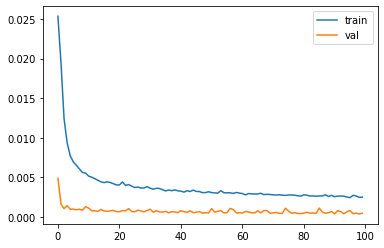

In [163]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

76/76 [==============================] - 4s 6ms/step


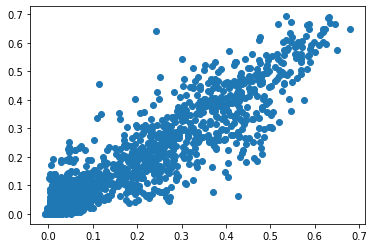

In [164]:
y_en_=ensemble_model.predict(X_test)
plt.scatter(1.1*y_en_,y_test)
plt.show()

In [165]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en_))]
df_['Actual']=y_test
df_['Predicted']=y_en_

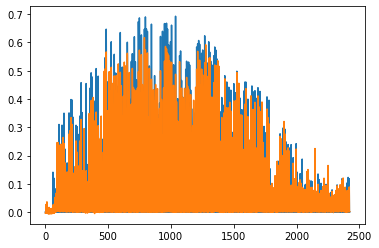

In [166]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])

plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [167]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
#model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
#y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1,y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200,validation_split=0.25,batch_size = 64)

Epoch 1/200
43/43 [==============================] - 10s 38ms/step - loss: 0.0292 - root_mean_squared_error: 0.1710 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0907
Epoch 2/200
43/43 [==============================] - 1s 12ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 3/200
43/43 [==============================] - 1s 13ms/step - loss: 0.0214 - root_mean_squared_error: 0.1462 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 4/200
43/43 [==============================] - 1s 13ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 5/200
43/43 [==============================] - 1s 13ms/step - loss: 0.0112 - root_mean_squared_error: 0.1056 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 6/200
43/43 [==============================] - 1s 13ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0020 - val

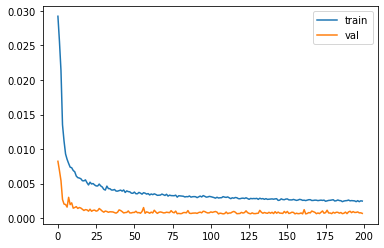

In [168]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

76/76 [==============================] - 1s 3ms/step


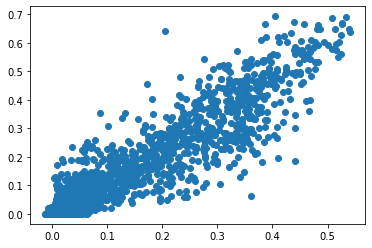

In [169]:
y_en=ensemble_model.predict(X_test)
plt.scatter(y_en,y_test)
plt.show()

In [170]:
df_ = pd.DataFrame()

In [171]:
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en


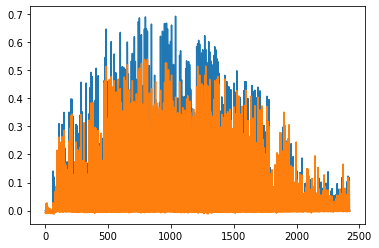

In [172]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [173]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [174]:
n_inputs=weather_input.shape[1]

In [175]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [176]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [177]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
190/190 - 4s - loss: 0.0931 - 4s/epoch - 19ms/step
Epoch 2/100
190/190 - 1s - loss: 0.0194 - 584ms/epoch - 3ms/step
Epoch 3/100
190/190 - 1s - loss: 0.0158 - 617ms/epoch - 3ms/step
Epoch 4/100
190/190 - 1s - loss: 0.0135 - 609ms/epoch - 3ms/step
Epoch 5/100
190/190 - 1s - loss: 0.0128 - 612ms/epoch - 3ms/step
Epoch 6/100
190/190 - 1s - loss: 0.0117 - 639ms/epoch - 3ms/step
Epoch 7/100
190/190 - 1s - loss: 0.0106 - 584ms/epoch - 3ms/step
Epoch 8/100
190/190 - 1s - loss: 0.0100 - 604ms/epoch - 3ms/step
Epoch 9/100
190/190 - 1s - loss: 0.0099 - 591ms/epoch - 3ms/step
Epoch 10/100
190/190 - 1s - loss: 0.0095 - 610ms/epoch - 3ms/step
Epoch 11/100
190/190 - 1s - loss: 0.0091 - 597ms/epoch - 3ms/step
Epoch 12/100
190/190 - 1s - loss: 0.0088 - 598ms/epoch - 3ms/step
Epoch 13/100
190/190 - 1s - loss: 0.0083 - 627ms/epoch - 3ms/step
Epoch 14/100
190/190 - 1s - loss: 0.0080 - 601ms/epoch - 3ms/step
Epoch 15/100
190/190 - 1s - loss: 0.0078 - 617ms/epoch - 3ms/step
Epoch 16/100
190/190 

In [178]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [182]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

190/190 [==============================] - 0s 2ms/step


In [183]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

190/190 [==============================] - 0s 2ms/step


In [184]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [185]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [186]:
inputs1=Input(shape=(X_train1.shape[1],X_train1.shape[2]))

In [187]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 100,validation_split=0.25,batch_size = 32)

Epoch 1/100
86/86 [==============================] - 33s 67ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 2/100
86/86 [==============================] - 3s 30ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 8.2430e-04 - val_root_mean_squared_error: 0.0287
Epoch 3/100
86/86 [==============================] - 3s 30ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 7.5186e-04 - val_root_mean_squared_error: 0.0274
Epoch 4/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 9.7900e-04 - val_root_mean_squared_error: 0.0313
Epoch 5/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0033 - root_mean_squared_error: 0.0574 - val_loss: 7.1092e-04 - val_root_mean_squared_error: 0.0267
Epoch 6/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0033 - root_mean_squared_error: 0.0579 - val_lo

In [191]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 100,validation_split=0.25,batch_size = 32)

Epoch 1/100
86/86 [==============================] - 15s 34ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 2/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0064 - root_mean_squared_error: 0.0798 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 3/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 8.5813e-04 - val_root_mean_squared_error: 0.0293
Epoch 4/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 5/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 6/100
86/86 [==============================] - 1s 17ms/step - loss: 0.0041 - root_mean_squared_error: 0.0636 - val_loss: 7.3893e-

76/76 [==============================] - 2s 4ms/step


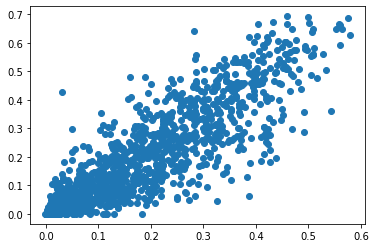

In [192]:
y_en=ensemble_model.predict(X_test1)
plt.scatter(y_en,y_test1)
plt.show()

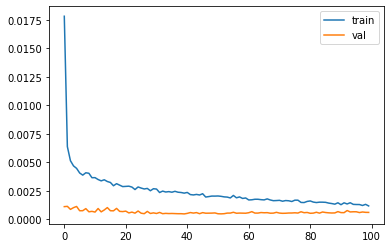

In [193]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [194]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en

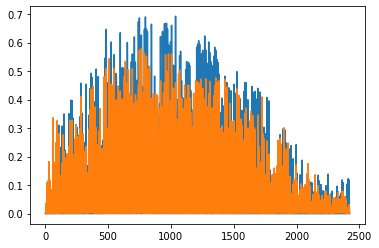

In [195]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [196]:
from sklearn.decomposition import PCA 

In [197]:
pca = PCA(n_components = 16)
pca.fit(weather_input)
data_pca = pca.transform(weather_input)
data_pca = pd.DataFrame(data_pca)

In [198]:
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.315470,-0.635044,-0.035510,-0.344345,-0.682535,-0.062841,-0.330765,0.128793,-0.059887,0.254162,-0.218945,-0.356641,-0.196729,0.051403,0.001759,0.015595
1,-1.226025,-0.703730,-0.125116,-0.396101,-0.533396,-0.151571,-0.247686,0.052865,-0.161037,0.067820,-0.162738,-0.093435,-0.240291,0.052839,-0.015169,-0.046896
2,-1.136111,-0.748327,-0.008599,-0.507683,-0.343579,-0.242189,-0.181355,0.044011,-0.296859,-0.084403,-0.129139,0.139991,-0.234859,0.048780,-0.006909,-0.062136
3,-0.360585,-1.083298,-0.615117,-0.343024,-0.218179,-0.306951,-0.081500,-0.218994,-0.138036,-0.110032,-0.032292,0.129693,0.099011,0.085454,0.008861,0.048537
4,-0.019347,-1.223119,-0.748530,-0.283598,0.072800,-0.343089,-0.081277,-0.262731,0.018789,-0.114361,-0.147910,0.111397,-0.009917,0.091248,0.051210,0.166556


In [199]:
num_steps = 4
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(data_pca,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [200]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [201]:
inputs1=Input(shape=(X_train2.shape[1],X_train2.shape[2]))

In [202]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train2, y_train2, epochs = 200,validation_split=0.2,batch_size = 64)

Epoch 1/200
46/46 [==============================] - 15s 56ms/step - loss: 0.0250 - root_mean_squared_error: 0.1582 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 2/200
46/46 [==============================] - 1s 21ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 9.0232e-04 - val_root_mean_squared_error: 0.0300
Epoch 3/200
46/46 [==============================] - 1s 21ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 5.6832e-04 - val_root_mean_squared_error: 0.0238
Epoch 4/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 5.0403e-04 - val_root_mean_squared_error: 0.0225
Epoch 5/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0048 - root_mean_squared_error: 0.0693 - val_loss: 4.8789e-04 - val_root_mean_squared_error: 0.0221
Epoch 6/200
46/46 [==============================] - 1s 21ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_lo

76/76 [==============================] - 2s 5ms/step


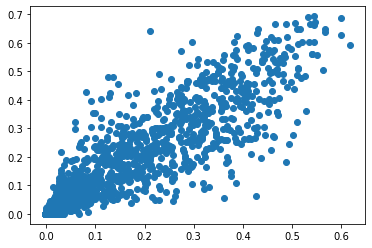

In [203]:
y_en=ensemble_model.predict(X_test2)
plt.scatter(y_en,y_test2)
plt.show()

In [204]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test2
df_['Predicted']=y_en

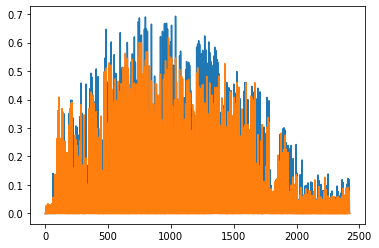

In [205]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()